# Exercício 06 - Implementação da Fase Backward

Aluno: Frederico Luis de Azevedo

Professor: Dr. Francisco de Assis Boldt

## Introdução

Neste exercício será implementado, com base no exercício anterior, a fase Backward de uma rede neural capaz de resolver um problema XOR 

## Bibliotecas e Inicialização

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from matplotlib.colors import ListedColormap

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

np.random.seed(42)

## Base de dados

Para este exercício será construída uma base de dados com duas características e quatro registros (variações) de cada racacterística da operação XOR

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]
)

y = np.array([0, 1,
              1, 0])

## Implementação da Rede Neural XOR (Com fases Backward e Forward)

In [3]:
class NeuralNetwork(BaseEstimator, ClassifierMixin):
    
    def __init__ (self, epochs = 10000, learning_rate = 0.2): 
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        
        self.w1 = []
        self.w2 = []
        
    def fit(self, X, y):
        
        # Inicializa os pesos aleatoriamente
        self.w1 = 2 * np.random.rand(3, 3) - 1
        self.w2 = 2 * np.random.rand(3, 1) - 1
        
        for epoch in range(self.epochs):
            
            for i in range(X.shape[0]):
                
                # Antes de iniciar, adiciona o bias
                a = self._add_bias(X[i])
            
                z1 = self._forward(a, self.w1)
                z2 = self._forward(z1, self.w2)
                
                pred = z2
                real = y[i]

                # delta do erro
                delta_error = self._delta_error(real, pred)
                    
                d1 = self._backward(delta_error, z1, z2, self.w2)
                d2 = self._backward(d1, a, z1, self.w1)
                
                
    def predict(self, X):
        
        result = []
        
        for x in X:
            
            # Antes de iniciar, adiciona o bias
            a = self._add_bias(x)
            
            z1 = self._forward(a, self.w1)
            z2 = self._forward(z1, self.w2)
            
            result.append(z2)
        
        return np.array(result)

    def _forward(self, x, w):
        r = np.dot(x, w)
        z = self._sigmoid(r)
        return z
    
    def _backward(self, delta_error, x, y, w):
        
        w_transpose = np.transpose(w)
        
        dy = self._sigmoid_der(y)
        
        delta_error_y = np.multiply(delta_error, dy)
        
        d = np.dot(delta_error_y, w_transpose)
        
        d2 = np.dot(x.reshape(len(x), 1), delta_error_y.reshape(1, len(delta_error_y)))

        w -= self.learning_rate * d2

        return d
    
    def _add_bias(self, x):
        return np.concatenate((np.ones(1).T, np.array(x)))
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _sigmoid_der(self, z):
        return np.multiply(z, (1 - z))
    
    def _delta_error(self, y, y_pred):
        r = y_pred - y
        return r

## Execução do Classificador

In [4]:
ann = NeuralNetwork()

In [5]:
ann.fit(X, y)

y_pred = ann.predict(X)
print('Input:\n', X)
print('-----------------')
print('Predictions:\n', y_pred)

Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
-----------------
Predictions:
 [[0.02488812]
 [0.97320437]
 [0.97151209]
 [0.02100067]]


## Plotando o Meshgrid

In [6]:
def plot_meshgrid(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


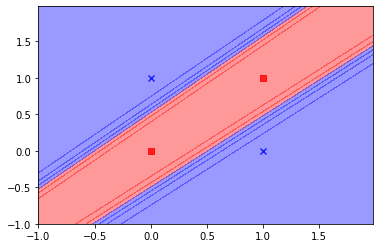

In [7]:
plot_meshgrid(X,y,ann)

## Resultados

Nesta atividade foi solicitado a implementação da fase Backward em uma rede neural capaz de resolver o problema XOR. Ao contrário da atividade anterior que inseria pesos fixos de forma manual, nessa atividade os pesos são iniciados aleatoriamente e então calibrados dentro da etapa **fit**. O ajuste dos pesos é feito conforme a quantidade de épocas através das etapas de Forward e Backward avaliando o delta do erro do valor calculado e esperado.

Durante o **fit**, os métodos Forward e Backward são executados duas vezes indicando que a rede possui duas camadas além da de entrada: uma camada intermediária e uma camada de saída, assim como no desenho do enunciado do exercício.

No método **predict**, o forward é executado novamente agora com os pesos já calculados para prever novos resultados.

O Plot do Meshgrid mostra que o resultado continua consistente e prevendo corretamente os valores propostos.